<a href="https://colab.research.google.com/github/hyeeeeeon/Challenge_DongA/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 캐글에서 데이터 셋 다운로드

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("safrin03/predictive-analytics-for-customer-churn-dataset")

print("Path to dataset files:", path)

100%|██████████| 24.0M/24.0M [00:00<00:00, 42.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/safrin03/predictive-analytics-for-customer-churn-dataset/versions/1


## 다운로드 된 데이터 셋 확인

In [2]:
import os

# 다운로드된 데이터셋 경로
path = kagglehub.dataset_download("safrin03/predictive-analytics-for-customer-churn-dataset")

# 파일 목록 출력
print("Downloaded files:", os.listdir(path))


Downloaded files: ['data_descriptions.csv', 'test.csv', 'train.csv']


# 1. 데이터셋 불러오고 확인하기

In [3]:
import pandas as pd

csv = pd.read_csv(os.path.join(path, "train.csv"))

df = pd.DataFrame(csv)

df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,47,Sci-Fi,3.697451,1,Male,8,Yes,No,FBZ38J108Z,0
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,35,Comedy,1.449742,4,Male,20,No,No,W4AO1Y6NAI,0
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,44,Action,4.012217,6,Male,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,36,Fantasy,2.135789,7,Female,5,No,Yes,63SJ44RT4A,0


In [4]:
# 데이터의 크기 확인
print('-------------------------행, 열----------------------')
print(df.shape)  # (행, 열)
print('---------------------컬럼 정보------------------------')
# 컬럼 정보 확인
print(df.info())
print('-------------------------결측치-----------------------')
# 결측치 확인
print(df.isnull().sum())
print('----------------------기본 통계-----------------------')
# 기본 통계 정보 확인
print(df.describe())

-------------------------행, 열----------------------
(243787, 21)
---------------------컬럼 정보------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-nul

# 데이터 전처리
* 이진값은 0 OR 1로 매핑
* 범주형 변수 칼럼 확인
* 나머지 범주형 변수는 one- hot encoding
* CustomerID는 이탈에 영향 없으니 drop

In [5]:
import pandas as pd

# 원본
df_raw = df

# 불필요한 컬럼 제거
df = df.drop(columns=['CustomerID'])

# 1️⃣ 이진 변수 먼저 숫자로 매핑
binary_map = {'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1}
binary_cols = ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled', 'Gender']
for col in binary_cols:
    df[col] = df[col].map(binary_map)

# 2️⃣ 이진 변수 제외한 범주형 변수만 선택
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols_to_encode = [col for col in cat_cols if col not in binary_cols]

# 3️⃣ 나머지만 원-핫 인코딩
df = pd.get_dummies(df, columns=cat_cols_to_encode, drop_first=True)
df


,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,PaymentMethod_Mailed check,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
0,20,11.055215,221.104302,0,0,36.758104,63.531377,10,2.176498,4,...,True,False,False,True,False,False,False,False,False,True
1,57,5.175208,294.986882,1,0,32.450568,25.725595,18,3.478632,8,...,False,True,False,False,False,True,False,False,False,False
2,73,12.106657,883.785952,1,0,7.395160,57.364061,23,4.238824,6,...,True,True,False,False,False,False,False,False,True,False
3,32,7.263743,232.439774,0,0,27.960389,131.537507,30,4.276013,2,...,False,False,True,False,False,True,False,True,False,False
4,57,16.953078,966.325422,1,0,20.083397,45.356653,20,3.616170,4,...,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,0,0,13.502729,80.367312,47,3.697451,1,...,True,True,False,False,False,False,False,False,False,True
243783,117,13.049257,1526.763053,0,1,24.963291,59.818441,35,1.449742,4,...,False,False,True,False,True,False,True,False,False,False
243784,113,14.514569,1640.146267,1,0,10.628728,176.186095,44,4.012217,6,...,False,False,True,False,True,False,False,False,False,False
243785,7,18.140555,126.983887,1,0,30.466782,153.386315,36,2.135789,7,...,False,False,True,False,True,False,False,False,True,False


In [6]:
# object 또는 category 타입만 대상으로
cat_cols = df_raw.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f'🔸 {col} 값 분포')
    print(df_raw[col].value_counts())
    print('─' * 40)


🔸 SubscriptionType 값 분포
SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64
────────────────────────────────────────
🔸 PaymentMethod 값 분포
PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64
────────────────────────────────────────
🔸 PaperlessBilling 값 분포
PaperlessBilling
No     121980
Yes    121807
Name: count, dtype: int64
────────────────────────────────────────
🔸 ContentType 값 분포
ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64
────────────────────────────────────────
🔸 MultiDeviceAccess 값 분포
MultiDeviceAccess
No     122035
Yes    121752
Name: count, dtype: int64
────────────────────────────────────────
🔸 DeviceRegistered 값 분포
DeviceRegistered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: count, dtype: int64
────────────────────────────────────────
🔸 GenrePreference 값 분포
Gen

In [7]:
# 전처리 후 컬럼 명 확인
print(df.isnull().sum())

AccountAge                        0
MonthlyCharges                    0
TotalCharges                      0
PaperlessBilling                  0
MultiDeviceAccess                 0
ViewingHoursPerWeek               0
AverageViewingDuration            0
ContentDownloadsPerMonth          0
UserRating                        0
SupportTicketsPerMonth            0
Gender                            0
WatchlistSize                     0
ParentalControl                   0
SubtitlesEnabled                  0
Churn                             0
SubscriptionType_Premium          0
SubscriptionType_Standard         0
PaymentMethod_Credit card         0
PaymentMethod_Electronic check    0
PaymentMethod_Mailed check        0
ContentType_Movies                0
ContentType_TV Shows              0
DeviceRegistered_Mobile           0
DeviceRegistered_TV               0
DeviceRegistered_Tablet           0
GenrePreference_Comedy            0
GenrePreference_Drama             0
GenrePreference_Fantasy     

# 이탈 비율 통계치로 확인하기

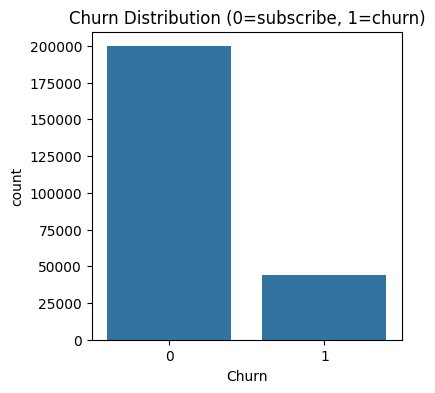

          AccountAge  MonthlyCharges   TotalCharges  PaperlessBilling  \
count  243787.000000   243787.000000  243787.000000     243787.000000   
mean       60.083758       12.490695     750.741017          0.499645   
std        34.285143        4.327615     523.073273          0.500001   
min         1.000000        4.990062       4.991154          0.000000   
25%        30.000000        8.738543     329.147027          0.000000   
50%        60.000000       12.495555     649.878487          0.000000   
75%        90.000000       16.238160    1089.317362          1.000000   
max       119.000000       19.989957    2378.723844          1.000000   

       MultiDeviceAccess  ViewingHoursPerWeek  AverageViewingDuration  \
count      243787.000000        243787.000000           243787.000000   
mean            0.499420            20.502179               92.264061   
std             0.500001            11.243753               50.505243   
min             0.000000             1.000065     

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이탈 비율 시각화
plt.figure(figsize=(4, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (0=subscribe, 1=churn)')
plt.show()

# 기술 통계
print(df.describe())


# 이탈 VS 잔존 비교 분석

# 상관관계 분석

Churn                             1.000000
AccountAge                       -0.197736
AverageViewingDuration           -0.146897
ContentDownloadsPerMonth         -0.129752
ViewingHoursPerWeek              -0.128645
TotalCharges                     -0.120529
MonthlyCharges                    0.100473
SupportTicketsPerMonth            0.084064
SubscriptionType_Premium         -0.033741
PaymentMethod_Credit card        -0.028441
UserRating                        0.022124
WatchlistSize                     0.021739
PaymentMethod_Electronic check    0.016913
GenrePreference_Comedy            0.015876
PaymentMethod_Mailed check        0.014441
GenrePreference_Sci-Fi            0.013183
SubtitlesEnabled                 -0.012372
Gender                           -0.007467
ContentType_TV Shows             -0.007029
ContentType_Movies               -0.006345
GenrePreference_Fantasy          -0.005853
SubscriptionType_Standard         0.005692
ParentalControl                  -0.005531
GenrePrefer

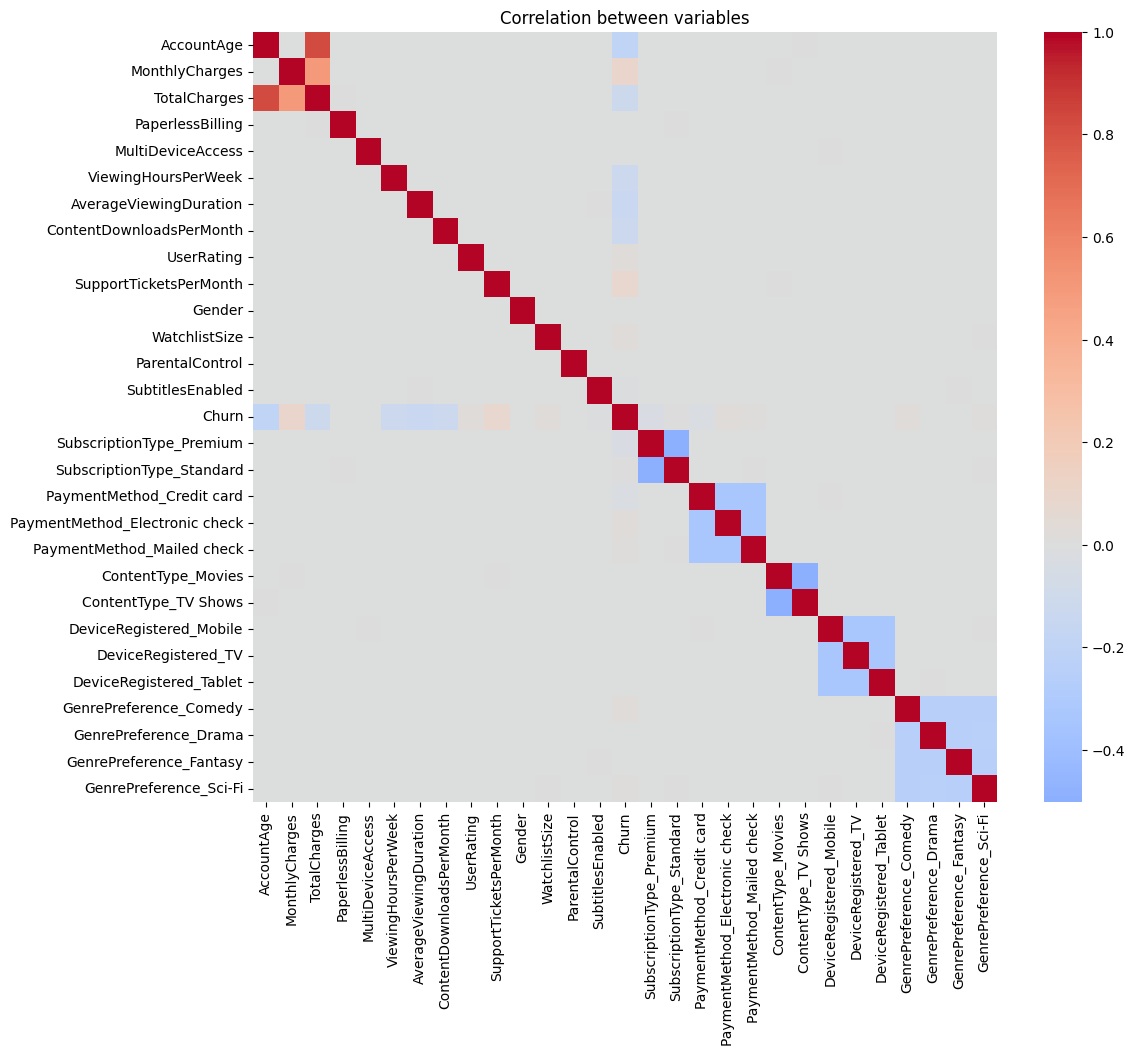

In [9]:
# Churn과의 상관계수 보기
corr = df.corr()['Churn'].sort_values(key=abs, ascending=False)
print(corr)

# 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation between variables')  # 변수 간 상관관계
plt.show()


## churn과 상관 관계가 있는 변수 찾기

* 파란부분: 음의 상관계수 (-0.1 이하 기준, TOP 5)
  
  => 값이 클 수록 이탈률이 낮음
  * AccountAge                       -0.197736
  * TotalCharges                     -0.120529
  * ViewingHoursPerWeek              -0.128645
  * AverageViewingDuration           -0.146897
  * ContentDownloadsPerMonth         -0.129752

* 붉은 부분: 양의 상관계수 (TOP 4)

  => 값이 클 수록 이탈확률 높음
  * MonthlyCharges                    0.100473
  * SupportTicketsPerMonth            0.084064
  * UserRating                        0.022124
  * WatchlistSize                     0.021739

* churn이랑 관계가 있는 건 아니지만 서로 관계 높은 컬럼
  * AccountAge & TotalCharges
  * MonthlyCharges & TotalCharges

| one-hot encoding 으로 인해 칼럼 쪼개진 부분 |
-----------------------------------------------
|  SubscriptionType_Premium   |      |
|  SubscriptionType_Standard |
|SubscriptionType_Basic (이게 없는 부분) |
|PaymentMethod_Credit card         |
PaymentMethod_Electronic check    
PaymentMethod_Mailed check  
PaymentMethod_Bank transfer (이게 없는 부분)      
ContentType_Movies                
ContentType_TV Shows
ContentType_Both (이게 없는 부분)               
DeviceRegistered_Mobile           
DeviceRegistered_TV               
DeviceRegistered_Tablet
DeviceRegistered_Computer (이게 없는 부분)          
GenrePreference_Comedy            
GenrePreference_Drama            
GenrePreference_Fantasy           
GenrePreference_Sci-Fi
GenrePreference_Fantasy (이게 없는 부분)        





## 없는 부분 이탈률로 비교

In [10]:
categorical_cols = ['SubscriptionType', 'PaymentMethod', 'ContentType', 'DeviceRegistered', 'GenrePreference']

for col in categorical_cols:
    print(f'📊 [{col}] 별 이탈률')
    print(df_raw.groupby(col)['Churn'].mean().sort_values())
    print('-' * 40)


📊 [SubscriptionType] 별 이탈률
SubscriptionType
Premium     0.162775
Standard    0.184314
Basic       0.196521
Name: Churn, dtype: float64
----------------------------------------
📊 [PaymentMethod] 별 이탈률
PaymentMethod
Credit card         0.162251
Bank transfer       0.179269
Mailed check        0.190888
Electronic check    0.192471
Name: Churn, dtype: float64
----------------------------------------
📊 [ContentType] 별 이탈률
ContentType
TV Shows    0.177398
Movies      0.177764
Both        0.188470
Name: Churn, dtype: float64
----------------------------------------
📊 [DeviceRegistered] 별 이탈률
DeviceRegistered
TV          0.179044
Computer    0.181350
Tablet      0.182147
Mobile      0.182372
Name: Churn, dtype: float64
----------------------------------------
📊 [GenrePreference] 별 이탈률
GenrePreference
Action     0.165866
Fantasy    0.176734
Drama      0.178709
Sci-Fi     0.191444
Comedy     0.193416
Name: Churn, dtype: float64
----------------------------------------


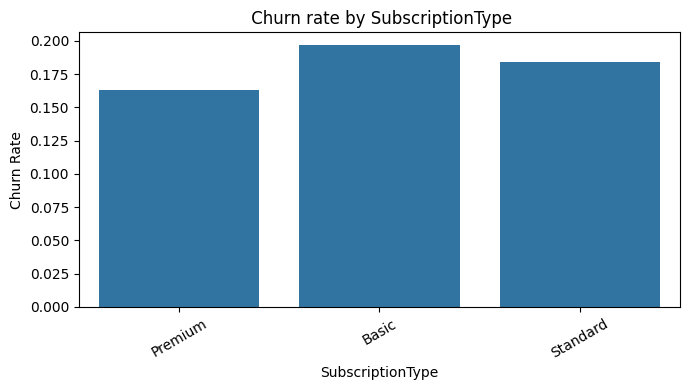

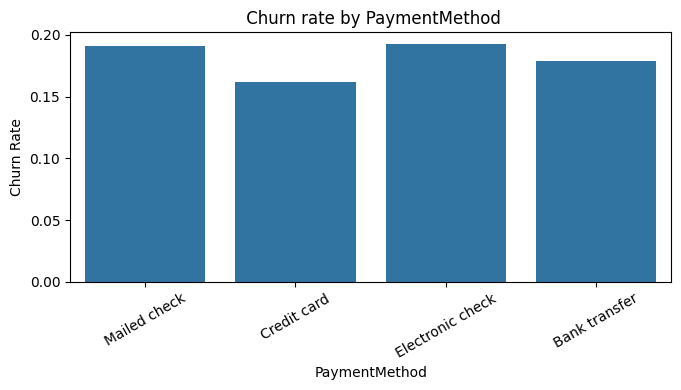

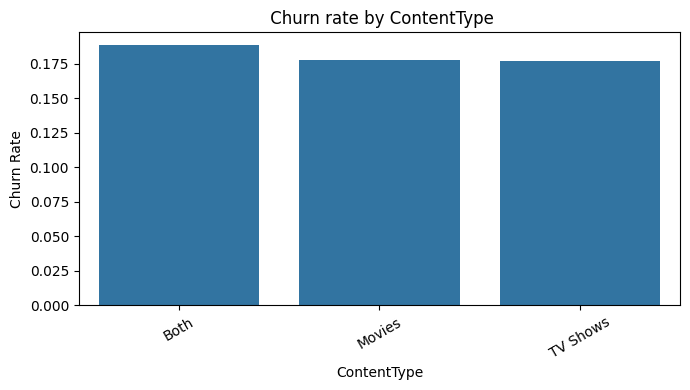

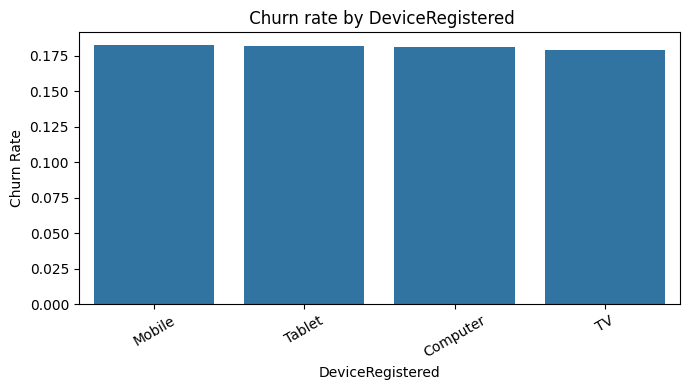

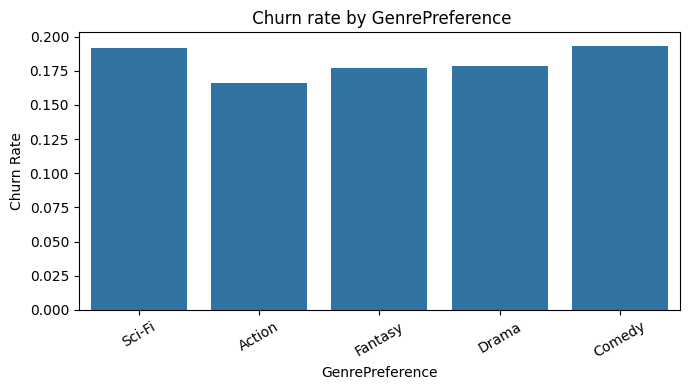

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.barplot(x=col, y='Churn', data=df_raw, estimator='mean', errorbar=None)
    plt.title(f' Churn rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


Churn                                    0           1  difference
MonthlyCharges                   12.286129   13.414880    1.128752
SupportTicketsPerMonth            4.390576    5.017451    0.626874
WatchlistSize                    11.944941   12.350867    0.405926
UserRating                        2.990688    3.057037    0.066349
PaymentMethod_Electronic check    0.248050    0.267100    0.019050
GenrePreference_Comedy            0.198247    0.214771    0.016524
PaymentMethod_Mailed check        0.246266    0.262482    0.016216
GenrePreference_Sci-Fi            0.195807    0.209452    0.013645
SubscriptionType_Standard         0.334766    0.341746    0.006979
DeviceRegistered_Mobile           0.249518    0.251437    0.001919
DeviceRegistered_Tablet           0.250525    0.252071    0.001546
PaperlessBilling                  0.499862    0.498665   -0.001198
MultiDeviceAccess                 0.499722    0.498054   -0.001668
GenrePreference_Drama             0.200561    0.197162   -0.00

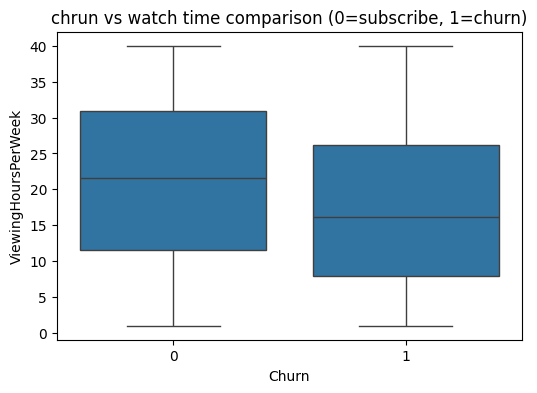

In [12]:
# 수치형 변수 비교
churn_grouped = df.groupby('Churn').mean().T
churn_grouped['difference'] = churn_grouped[1] - churn_grouped[0]
print(churn_grouped.sort_values(by='difference', ascending=False))

# 시청 시간 비교 시각화 예시
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='ViewingHoursPerWeek', data=df)
plt.title('chrun vs watch time comparison (0=subscribe, 1=churn)')
plt.show()


# 예측 모델링

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     39968
           1       0.57      0.08      0.14      8790

    accuracy                           0.82     48758
   macro avg       0.70      0.53      0.52     48758
weighted avg       0.78      0.82      0.76     48758



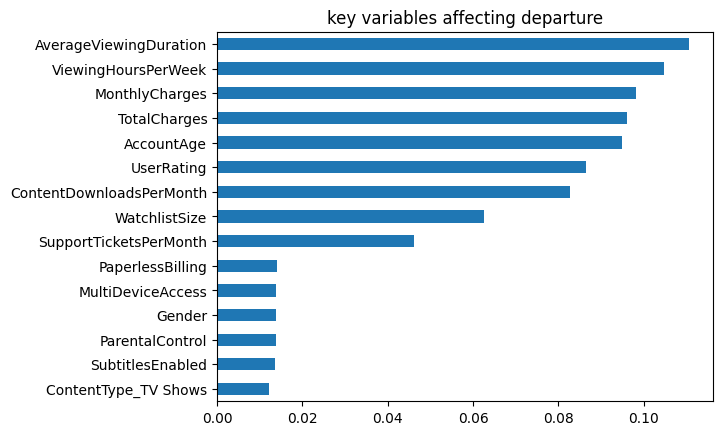

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터 분할
X = df.drop(columns='Churn')
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 변수 중요도 시각화
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).tail(15).plot(kind='barh')
plt.title('key variables affecting departure')    # 이탈에 영향을 주는 주요 변수
plt.show()


In [17]:
for col in ['AverageViewingDuration', 'ViewingHoursPerWeek', 'MonthlyCharges', 'AccountAge', 'UserRating']:
    print(f"\n🔹 {col} 요약")
    print(df[col].describe())



🔹 AverageViewingDuration 요약
count    243787.000000
mean         92.264061
std          50.505243
min           5.000547
25%          48.382395
50%          92.249992
75%         135.908048
max         179.999275
Name: AverageViewingDuration, dtype: float64

🔹 ViewingHoursPerWeek 요약
count    243787.000000
mean         20.502179
std          11.243753
min           1.000065
25%          10.763953
50%          20.523116
75%          30.219396
max          39.999723
Name: ViewingHoursPerWeek, dtype: float64

🔹 MonthlyCharges 요약
count    243787.000000
mean         12.490695
std           4.327615
min           4.990062
25%           8.738543
50%          12.495555
75%          16.238160
max          19.989957
Name: MonthlyCharges, dtype: float64

🔹 AccountAge 요약
count    243787.000000
mean         60.083758
std          34.285143
min           1.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: AccountAge, dtype: float64

🔹 UserRating 

###  AverageViewingDuration
* mean         92.264061
* std          50.505243
* 25%          48.382395
* 50%          92.249992
* 75%         135.908048



### ViewingHoursPerWeek
* mean         20.502179
* std          11.243753
* 25%          10.763953
* 50%          20.523116
* 75%          30.219396



### MonthlyCharges
* mean         12.490695
* std           4.327615
* 25%           8.738543
* 50%          12.495555
* 75%          16.238160



### AccountAge
* mean         60.083758
* std          34.285143
* 25%          30.000000
* 50%          60.000000
* 75%          90.000000


### UserRating
* mean          3.002713
* std           1.155259
* 25%           2.000853
* 50%           3.002261
* 75%           4.002157


# 고위험 고객 정의 및 이탈 방지 전략

In [18]:
# 이탈에 영향을 주는 주요 요인 예시 기준 (평균값으로 설정)
high_risk_customers = df[
    (df['MonthlyCharges'] > 12) &
    (df['ViewingHoursPerWeek'] < 20) &
    (df['AverageViewingDuration'] < 92) &
    (df['AccountAge'] < 60) &
    (df['UserRating'] < 3.0)
]

print("⚠️ 고위험 고객 수:", len(high_risk_customers))

# 비율 확인
print("전체 고객 중 고위험 고객 비율: {:.2%}".format(len(high_risk_customers) / len(df)))

# 해당 고객 세부 분석
print(high_risk_customers[['MonthlyCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'AccountAge', 'UserRating']].describe())


⚠️ 고위험 고객 수: 7719
전체 고객 중 고위험 고객 비율: 3.17%
       MonthlyCharges  ViewingHoursPerWeek  AverageViewingDuration  \
count     7719.000000          7719.000000             7719.000000   
mean        16.021068            10.571587               48.766765   
std          2.308436             5.461525               24.933155   
min         12.000399             1.000086                5.002749   
25%         14.016420             5.864986               27.316546   
50%         16.045292            10.603154               48.924698   
75%         18.021860            15.292151               70.221910   
max         19.989741            19.999570               91.993400   

        AccountAge   UserRating  
count  7719.000000  7719.000000  
mean     30.065553     2.007233  
std      16.870246     0.575351  
min       1.000000     1.000007  
25%      15.000000     1.518724  
50%      30.000000     2.010244  
75%      44.000000     2.507030  
max      59.000000     2.999814  


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# 1. 데이터 분리
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 모델 정의
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 3. 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    results[name] = {
        "model": model,
        "roc_auc": auc,
        "proba": y_proba
    }
    print(f"✅ {name} ROC AUC: {auc:.4f}")

# 4. 가장 좋은 모델 선택
best_model_name = max(results, key=lambda k: results[k]["roc_auc"])
best_model = results[best_model_name]["model"]
best_proba = results[best_model_name]["proba"]

print(f"\n💡 가장 성능 좋은 모델: {best_model_name} (ROC AUC = {results[best_model_name]['roc_auc']:.4f})")

# 5. 이탈 확률 높은 고객 10명 추출
X_test_with_prob = X_test.copy()
X_test_with_prob['Churn_Prob'] = best_proba
top_churn_risk = X_test_with_prob.sort_values(by="Churn_Prob", ascending=False).head(10)

# 결과 출력
top_churn_risk


✅ RandomForest ROC AUC: 0.7324


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ LogisticRegression ROC AUC: 0.7537


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:26:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost ROC AUC: 0.7397

💡 가장 성능 좋은 모델: LogisticRegression (ROC AUC = 0.7537)


,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Churn_Prob
77206,3,19.696428,59.089284,0,1,9.576117,18.608691,3,4.671684,7,...,False,False,True,False,False,True,False,False,False,0.852962
214378,12,17.379218,208.550620,0,1,3.082641,18.647798,1,4.572408,4,...,False,False,True,False,False,True,False,False,False,0.844469
55166,1,19.986963,19.986963,1,0,12.911372,5.383113,13,1.766752,8,...,False,True,False,False,False,False,False,False,True,0.841874
64023,1,17.895874,17.895874,0,0,2.075202,15.231957,11,3.360727,5,...,True,False,True,False,False,True,False,False,False,0.824675
164931,30,19.383600,581.507994,0,0,9.856751,19.338640,1,4.903065,9,...,False,False,False,True,False,False,False,True,False,0.819946
133839,2,18.344394,36.688788,0,0,2.856142,6.821461,17,2.163807,5,...,True,False,False,False,False,False,False,False,True,0.817173
86185,37,18.423377,681.664940,0,0,5.794620,7.184072,5,4.537222,9,...,False,False,False,True,False,True,False,False,False,0.815935
2341,8,18.109730,144.877839,1,0,4.050246,40.736330,5,4.742544,9,...,False,False,True,False,False,False,False,True,False,0.814673
24965,4,19.421802,77.687207,0,0,4.045842,60.652836,6,2.072654,9,...,True,False,False,True,False,True,False,False,False,0.812728
33612,8,17.750248,142.001984,0,1,2.751161,6.900651,13,4.065924,5,...,False,False,False,True,False,False,True,False,False,0.809152


In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. 데이터 분리
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 모델 & 하이퍼파라미터 정의
model_configs = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 5, 10]
        }
    },
    "LogisticRegression": {
        "model": Pipeline([
            ('scaler', StandardScaler()),  # 스케일링 포함
            ('clf', LogisticRegression(max_iter=1000, random_state=42))
        ]),
        "params": {
            "clf__C": [0.01, 0.1, 1, 10],
            "clf__penalty": ["l2"]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 6],
            "learning_rate": [0.05, 0.1]
        }
    }
}

best_models = {}
for name, config in model_configs.items():
    print(f"🔍 {name} 하이퍼파라미터 튜닝 중...")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = {
        "model": grid.best_estimator_,
        "score": grid.best_score_
    }
    print(f"✅ {name} 최고 ROC AUC (CV): {grid.best_score_:.4f}")

# 3. 최고 성능 모델 선택
best_model_name = max(best_models, key=lambda k: best_models[k]["score"])
final_model = best_models[best_model_name]["model"]
print(f"\n🏆 최종 선택된 모델: {best_model_name} (ROC AUC: {best_models[best_model_name]['score']:.4f})")

# 4. 테스트셋 예측 및 확률 계산
y_proba = final_model.predict_proba(X_test)[:, 1]
X_test_with_prob = X_test.copy()
X_test_with_prob['Churn_Prob'] = y_proba
top_churn_risk = X_test_with_prob.sort_values(by="Churn_Prob", ascending=False).head(10)

# 결과 출력
top_churn_risk


🔍 RandomForest 하이퍼파라미터 튜닝 중...
✅ RandomForest 최고 ROC AUC (CV): 0.7403
🔍 LogisticRegression 하이퍼파라미터 튜닝 중...
✅ LogisticRegression 최고 ROC AUC (CV): 0.7492
🔍 XGBoost 하이퍼파라미터 튜닝 중...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:10:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost 최고 ROC AUC (CV): 0.7465

🏆 최종 선택된 모델: LogisticRegression (ROC AUC: 0.7492)


,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Churn_Prob
77206,3,19.696428,59.089284,0,1,9.576117,18.608691,3,4.671684,7,...,False,False,True,False,False,True,False,False,False,0.851461
214378,12,17.379218,208.550620,0,1,3.082641,18.647798,1,4.572408,4,...,False,False,True,False,False,True,False,False,False,0.842075
55166,1,19.986963,19.986963,1,0,12.911372,5.383113,13,1.766752,8,...,False,True,False,False,False,False,False,False,True,0.840548
64023,1,17.895874,17.895874,0,0,2.075202,15.231957,11,3.360727,5,...,True,False,True,False,False,True,False,False,False,0.823238
164931,30,19.383600,581.507994,0,0,9.856751,19.338640,1,4.903065,9,...,False,False,False,True,False,False,False,True,False,0.815699
133839,2,18.344394,36.688788,0,0,2.856142,6.821461,17,2.163807,5,...,True,False,False,False,False,False,False,False,True,0.815652
2341,8,18.109730,144.877839,1,0,4.050246,40.736330,5,4.742544,9,...,False,False,True,False,False,False,False,True,False,0.814122
86185,37,18.423377,681.664940,0,0,5.794620,7.184072,5,4.537222,9,...,False,False,False,True,False,True,False,False,False,0.813300
24965,4,19.421802,77.687207,0,0,4.045842,60.652836,6,2.072654,9,...,True,False,False,True,False,True,False,False,False,0.812376
33612,8,17.750248,142.001984,0,1,2.751161,6.900651,13,4.065924,5,...,False,False,False,True,False,False,True,False,False,0.806327
